Import data to dataset and result format for sklearn

In [150]:
import pandas as pd
df = pd.read_csv('../data/train.csv')
dataset = []
result = []
for index, row in df.iterrows():
    data = []
    counter = 0
    for column in row:
        counter += 1
        if counter == 2:
            result.append(column)
        else:
            data.append(column)
    dataset.append(data)

In [174]:
import pandas as pd
import math
df = pd.read_csv('../data/train.csv')
dataset = []
result = []
for index, row in df.iterrows():
    data = []
    counter = 0
    for column in row:
        counter += 1
        if counter == 2:
            result.append(math.log10(column))
        else:
            data.append(column)
    dataset.append(data)

In [157]:
import pandas as pd
df = pd.read_csv('../data/test.csv')
datatest = []
for index, row in df.iterrows():
    data = []
    counter = 0
    for column in row:
        counter += 1
        data.append(column)
    datatest.append(data)
    
# Adding difference temperature and humidity between inside and sekitar
for row in datatest:
    for index in range(len(row)):
        if (index > 1) and (index % 2 == 0) and (index != 12) and (index < 20):
            row.append(row[index] - row[20])
        elif (index > 1) and (index % 2 == 1) and (index != 13) and (index < 20):
            row.append(row[index] - row[22])

# Adding tenth minute a day mean energy used, one day = 144xten minutes
total_energy = []
counter = []
mean_energy = []
for i in range(144):
    total_energy.append(0)
    counter.append(0)

for index in range(len(datatest)):
    total_energy[int(datatest[index][0]%144)] += result[index]
    counter[int(datatest[index][0]%144)] += 1
    
for i in range(144):
    mean_energy.append(float(total_energy[i])/float(counter[i]))

for index in range(len(datatest)):
    datatest[index].append(mean_energy[int(datatest[index][0]%144)])

# Removing column A and Temperature Humidity Sekitar and Inside house
for row in datatest:
    for index in reversed(range(len(row))):
        if ((index > 1) and (index <= 20)) or (index == 22):
            del row[index]
    del row[0]

# Getting max and min value
max_value_dataset = []
min_value_dataset = []
first_iter = True
for row in datatest:
    counter = 0
    for value in row:
        if first_iter:
            max_value_dataset.append(value)
            min_value_dataset.append(value)
        else:
            if max_value_dataset[counter]<value:
                max_value_dataset[counter] = value
            if min_value_dataset[counter]>value:
                min_value_dataset[counter] = value
        counter += 1
    first_iter = False

# All column is being normalized
print datatest[0][1]
for row in datatest:
    counter = 0
    for value in row:
        row[counter] = float(value-min_value_dataset[counter])/float(max_value_dataset[counter]-min_value_dataset[counter])*9+1  
        counter += 1
print datatest[0][1]

# Selection?
remove_index = [20,19,17,13,11,9,7,6,5,4,3,2,1]
for row in datatest:
    for i in remove_index:
        del row[i]

747.566666667
2.29460580913


Feature Engineering / Creation

In [25]:
# Adding prev
for index in range(len(dataset)):
    if index == 0:
        dataset[index].append(0)
    else:
        dataset[index].append(result[index-1])

In [177]:
# Adding tenth minute a day mean energy used, one day = 144xten minutes
total_energy = []
counter = []
mean_energy = []
for i in range(144):
    total_energy.append(0)
    counter.append(0)

for index in range(len(dataset)):
    total_energy[int(dataset[index][0]%144)] += result[index]
    counter[int(dataset[index][0]%144)] += 1
    
for i in range(144):
    mean_energy.append(float(total_energy[i])/float(counter[i]))

for index in range(len(dataset)):
    dataset[index].append(mean_energy[int(dataset[index][0]%144)])

In [125]:
# Adding hour a day mean energy used, one day = 144xten minutes, 1 hour = 6xten minutes
total_energy = []
counter = []
mean_energy = []
for i in range(24):
    total_energy.append(0)
    counter.append(0)

for index in range(len(dataset)):
    total_energy[int(dataset[index][0]%144)//6] += result[index]
    counter[int(dataset[index][0]%144)//6] += 1
    
for i in range(24):
    mean_energy.append(float(total_energy[i])/float(counter[i]))

for index in range(len(dataset)):
    dataset[index].append(mean_energy[int(dataset[index][0]%144)//6])

In [82]:
# Adding average temperature inside house
for row in dataset:
    total_temperature = 0
    counter = 0
    for index in range(len(row)):
        if (index > 1) and (index % 2 == 0) and (index != 12) and (index < 20):
            total_temperature += row[index]
            counter += 1
    mean_temperature = float(total_temperature)/float(counter)
    row.append(mean_temperature)

In [83]:
# Adding average humidity inside house
for row in dataset:
    total_humidity = 0
    counter = 0
    for index in range(len(row)):
        if (index > 1) and (index % 2 == 1) and (index != 13) and (index < 20):
            total_humidity += row[index]
            counter += 1
    mean_humidity = float(total_humidity)/float(counter)
    row.append(mean_humidity)

In [84]:
# Adding average temperature outside house
for row in dataset:
    mean_temperature = (row[12]+row[20]+row[25])/3
    row.append(mean_temperature)

In [85]:
# Adding average humidity outside house
for row in dataset:
    mean_temperature = (row[13]+row[22])/2
    row.append(mean_temperature)

In [ ]:
# Adding difference between temperature inside and outside
for row in dataset:
    for index in range(len(row)):
        if (index > 1) and (index % 2 == 0) and (index != 12) and (index < 20):
            row.append(row[index] - row[12])

In [ ]:
# Adding difference between humidity inside and outside
for row in dataset:
    for index in range(len(row)):
        if (index > 1) and (index % 2 == 1) and (index != 13) and (index < 20):
            row.append(row[index] - row[13])

In [71]:
# Adding difference temperature and humidity between inside and outside
for row in dataset:
    for index in range(len(row)):
        if (index > 1) and (index % 2 == 0) and (index != 12) and (index < 20):
            row.append(row[index] - row[12])
        elif (index > 1) and (index % 2 == 1) and (index != 13) and (index < 20):
            row.append(row[index] - row[13])

In [176]:
# Adding difference temperature and humidity between inside and sekitar
for row in dataset:
    for index in range(len(row)):
        if (index > 1) and (index % 2 == 0) and (index != 12) and (index < 20):
            row.append(row[index] - row[20])
        elif (index > 1) and (index % 2 == 1) and (index != 13) and (index < 20):
            row.append(row[index] - row[22])

In [ ]:
# Cancel adding any new feature
for row in dataset:
    row = row[:-1]

Feature Selection / Removal By Naked Eye

In [42]:
# Removing column A
for row in dataset:
    del row[0]

In [100]:
# Removing column A and Temperature Humidity Inside house
for row in dataset:
    for index in reversed(range(len(row))):
        if (index > 1) and (index % 2 == 0) and (index != 12) and (index < 20):
            del row[index]
        elif (index > 1) and (index % 2 == 1) and (index != 13) and (index < 20):
            del row[index]
    del row[0]

In [73]:
# Removing column A and Temperature Humidity Outside and Inside house (exclude sekitar)
for row in dataset:
    for index in reversed(range(len(row))):
        if (index > 1) and (index < 20):
            del row[index]
    del row[0]

In [178]:
# Removing column A and Temperature Humidity Sekitar and Inside house
for row in dataset:
    for index in reversed(range(len(row))):
        if ((index > 1) and (index <= 20)) or (index == 22):
            del row[index]
    del row[0]

In [87]:
# Removing column A and Temperature Humidity Outside, Sekitar and Inside house
for row in dataset:
    for index in reversed(range(len(row))):
        if ((index > 1) and (index <= 20)) or (index == 22) or (index == 25):
            del row[index]
    del row[0]

Data Checker

In [101]:
# Checking dataset
for index in range(10):
    print dataset[index]
    print

[30.0, 7.0266666666666708, 84.256666666666703, 6.5999999999999996, 733.5, 92.0, 7.0, 63.0, 5.2999999999999998, 13.275433157104999, 13.275433157104999, 13.290000000000001, -44.4033333333333, 12.6, -47.210000000000001, 13.19, -47.270000000000003, 12.4, -46.433333333333302, 10.5666666666667, -36.799999999999997, 10.6, -50.373333333333299, 11.6, -43.100000000000001, 10.433333333333303, -46.469999999999999, 139.54782608695652]

[30.0, 6.8333333333333295, 84.063333333333304, 6.4833333333333298, 733.60000000000002, 92.0, 6.6666666666666705, 59.1666666666667, 5.2000000000000002, 18.606194981839508, 18.606194981839508, 13.40666666666667, -45.3066666666667, 12.716666666666669, -47.277500000000003, 13.306666666666668, -47.210000000000001, 12.516666666666669, -46.0075, 10.683333333333369, -36.799999999999997, 10.716666666666669, -50.439999999999998, 11.716666666666669, -43.136666666666699, 10.583333333333368, -46.439999999999998, 139.54782608695652]

[30.0, 6.5599999999999996, 83.156666666666695, 

Normalization each column

In [179]:
# Getting max and min value
max_value_dataset = []
min_value_dataset = []
first_iter = True
for row in dataset:
    counter = 0
    for value in row:
        if first_iter:
            max_value_dataset.append(value)
            min_value_dataset.append(value)
        else:
            if max_value_dataset[counter]<value:
                max_value_dataset[counter] = value
            if min_value_dataset[counter]>value:
                min_value_dataset[counter] = value
        counter += 1
    first_iter = False

In [180]:
# All column is being normalized
print dataset[0][1]
for row in dataset:
    counter = 0
    for value in row:
        row[counter] = float(value-min_value_dataset[counter])/float(max_value_dataset[counter]-min_value_dataset[counter])*9+1  
        counter += 1
print dataset[0][1]

733.5
1.87906976744


In [103]:
# All column except last x is being normalized
x = 1
print dataset[0][1]
for row in dataset:
    counter = 0
    for value in row:
        if counter == len(row)-x:
            break;
        row[counter] = float(value-min_value_dataset[counter])/float(max_value_dataset[counter]-min_value_dataset[counter])*9+1  
        counter += 1
print dataset[0][1]
print dataset[1][-1]
print dataset[1][-2]

7.02666666667
5.44147766539
139.547826087
3.47876704734


Normalization consider same type

In [45]:
#                    wh         celcius                     kelembapan          mmgh m/s   km  A/c  rnd1 rnd2
same_type_columns = [[0],[1,3,5,7,9,11,13,15,17,19],[2,4,6,8,10,12,14,16,18,21],[20],[22],[23],[24],[25],[26]]
max_value_dataset = [0,0,0,0,0,0,0,0,0]
min_value_dataset = [0,0,0,0,0,0,0,0,0]
first_iter = True
for row in dataset:
    counter = 0
    for value in row:
        if first_iter:
            counter_temp = 0
            for i in same_type_columns:
                if counter in i:
                    max_value_dataset[counter_temp] = value
                    min_value_dataset[counter_temp] = value 
                    break
                counter_temp += 1
        else:
            counter_temp = 0
            for i in same_type_columns:
                if counter in i:
                    if max_value_dataset[counter_temp]<value:
                        max_value_dataset[counter_temp] = value
                    if min_value_dataset[counter_temp]>value:
                        min_value_dataset[counter_temp] = value
                    break
                counter_temp += 1
        counter += 1
    first_iter = False

In [46]:
print dataset[0][1]
for row in dataset:
    counter = 0
    for value in row:
        counter_temp = 0
        for i in same_type_columns:
            if counter in i:
                row[counter] = float(value-min_value_dataset[counter_temp])/float(max_value_dataset[counter_temp]-min_value_dataset[counter_temp])*9+1  
            counter_temp += 1
        counter += 1
print dataset[0][1]

19.89
8.12940637876


Export data to CSV

In [43]:
headers = ['B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','AA','AB','AC']
counter = 0
for value in result:
    dataset[counter] = [value] + dataset[counter]
    counter += 1
df = pd.DataFrame(dataset,columns=headers)
df.to_csv('../data/normalized_train.csv')

Export data to CSV Per Type

In [17]:
headers = ['B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','AA','AB','AC']
counter = 0
for value in result:
    dataset[counter] = [value] + dataset[counter]
    counter += 1
df = pd.DataFrame(dataset,columns=headers)
df.to_csv('../data/normalized_per_type_train.csv')

Feature Selection using sklearn score

In [181]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 # all positive
from sklearn.feature_selection import f_classif # can negative
from sklearn.feature_selection import mutual_info_classif # can negative

selector = SelectKBest(f_classif, k=11).fit(dataset,result)
x_new = selector.transform(dataset) # not needed to get the score
scores = selector.scores_
print scores
print len(x_new)
print len(x_new[0])

[  24.26955591    3.99503307    2.41666005    0.93960358    2.60330993
    1.03189808    1.03189808    3.99418762   12.98409261    2.87007017
    9.57447673    4.3382917    10.31798023    3.83770024   10.19089963
    5.21578031   10.58252802    4.47437809    7.01048755    2.7949886
    4.86446672    5.57822067    6.6048491   108.68287387]
13814
11


Result
12581.46181535621 - vanilla
12608.584825490818 - timer per day
12584.960279727657 - hour per day
11222.669250029881 - vanilla, normalization per column
11421.509552801677 - vanilla, normalization per same column type
10750.418255832061 - vanilla, normalization per column, remove 9 worst feature
10918.825433973192 - vanilla, normalization per column, remove 17 worst feature
10820.637552574482 - vanilla, normalization per column, remove 13 worst feature
10779.300009552198 - vanilla, normalization per column, remove 11 worst feature
10770.65932996947 - vanilla, normalization per column, remove 7 worst feature
10786.789697351858 - vanilla, normalization per column, remove 10 worst feature
10475.649827301211 - time hourly, normalization per column, remove 10 worst feature
10511.000233643352 - time hourly, normalization per column, remove 12 worst feature
10484.04556310732 - time hourly, normalization per column, remove 11 worst feature
10908.89726937462 - time hourly, normalization per column, PCA 5 component
10732.45742690714 - time hourly, normalization per column, remove 10 worst feature, PCA 4 component
10958.215653160878 - time hourly, normalization per column, PCA 4 component
11507.904482159478 - time hourly, normalization per column, mean energy, remove feature
12637.424179508133 - time hourly, mean energy, diff temp and kelembapan
12580.125927746261 - time hourly, mean energy, diff temp and kelembapan, remove 4 worst feature
11364.573324487092 - time hourly, normalization per column, mean energy, diff temp and kelembapan, remove 8 worst feature
104.26903073981951 - time hourly mean energy, normalization per column, remove 9 worst
107.61908726130784 - time hourly mean energy, normalization per column, prev, remove 9 worst
108.45847219609203 - time hourly mean energy, normalization per column, prev, remove 9 worst, round
104.18454311812019 - time hourly mean energy, normalization per column, remove 10 worst, average temp and humidity (ikut keapus)
104.17737071589752 - time hourly mean energy, normalization per column, remove 10 worst, average temp and humidity (ikut keapus), round
104.58459087411767 - time hourly mean energy, normalization per column, remove 10 worst, average temp and humidity, hapus semua temp humidity inside
104.53501391528658 - time hourly mean energy, normalization per column, remove 6 worst, average temp and humidity inside outside, hapus semua temp humidity inside/outside
106.79045904962251 - time hourly mean energy, normalization per column, average temp and humidity inside outside, hapus semua temp humidity inside/outside
104.53459934878985 - time hourly mean energy, normalization per column, remove 13 worst, diff temp and humidity sekitar, hapus semua temp humidity inside
103.09175452738367 - time hourly mean energy, normalization per column, remove 13 worst, diff temp and humidity sekitar, hapus semua temp humidity inside dan sekitar
103.14224856957703 - time hourly mean energy, normalization per column all, remove 13 worst, diff temp and humidity sekitar, hapus semua temp humidity inside dan sekitar, rounding
102.82322400493165 - ten minutes mean energy, normalization per column all, remove 13 worst, diff temp and humidity sekitar, hapus semua temp humidity inside dan sekitar
WHAT TO DO, Rata2 in selisih, rata2 in inside outside

PCA,looking best variance -> do component cut

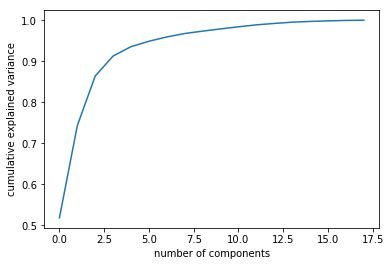

In [109]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
pca = PCA().fit(x_new)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [113]:

pca = PCA(n_components=4).fit(dataset)
pca.n_components_


4

In [114]:
components = pca.transform(dataset)
filtered_dataset = pca.inverse_transform(components)

In [111]:
components = pca.transform(x_new)
filtered_dataset = pca.inverse_transform(components)

Split the dataset

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x_new, result, test_size=0.20, random_state=42)

SVM Implementation Regression

In [95]:
from sklearn import svm
clf = svm.SVR()
clf.fit(dataset, result) 
prediction = clf.predict(dataset)

In [182]:
# Feature score
from sklearn import svm
clf = svm.SVR()
clf.fit(x_new, result) 
prediction = clf.predict(x_new)

In [148]:
# Feature score
from sklearn import svm
clf = svm.SVR()
clf.fit(X_train, y_train) 
prediction = clf.predict(X_test)

In [115]:
# PCA
from sklearn import svm
clf = svm.SVR()
clf.fit(filtered_dataset, result) 
prediction = clf.predict(filtered_dataset)

10958.215653160878

MLP Implementation Regression

In [5]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(x_new, result)
prediction = clf.predict(x_new)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [108]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

In [184]:
for i in range(len(prediction)):
    prediction[i] = math.exp(prediction[i])
    result[i] = math.exp(result[i])

In [183]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(result, prediction))

0.20369344106202394

In [149]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(y_test, prediction))

103.05185599830048

Evaluation MSE

In [145]:
import math

def round_custom(x):
    return int(round((x / 10.0),) * 10)

print roundup(45)
print roundup(46)
print roundup(42)
for i in range(len(prediction)):
    prediction[i] = round_custom(prediction[i])
print prediction

50
50
40
[ 100.  100.  100. ...,   80.   80.   80.]


In [146]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(result, prediction))

102.89279035309244

In [62]:
print min(result)
print max(result)
print result

10.0
910.0
[60.0, 60.0, 50.0, 50.0, 60.0, 50.0, 60.0, 60.0, 60.0, 70.0, 230.0, 580.0, 430.0, 250.0, 100.0, 100.0, 90.0, 70.0, 80.0, 140.0, 120.0, 190.0, 110.0, 110.0, 110.0, 110.0, 100.0, 100.0, 100.0, 100.0, 110.0, 400.0, 400.0, 390.0, 240.0, 60.0, 60.0, 60.0, 50.0, 70.0, 60.0, 40.0, 40.0, 30.0, 40.0, 50.0, 310.0, 380.0, 380.0, 370.0, 120.0, 50.0, 40.0, 50.0, 40.0, 50.0, 50.0, 50.0, 40.0, 40.0, 30.0, 20.0, 20.0, 40.0, 50.0, 50.0, 40.0, 50.0, 40.0, 40.0, 40.0, 60.0, 50.0, 50.0, 40.0, 40.0, 40.0, 40.0, 50.0, 70.0, 40.0, 30.0, 20.0, 30.0, 40.0, 50.0, 60.0, 60.0, 70.0, 60.0, 140.0, 110.0, 90.0, 60.0, 60.0, 60.0, 50.0, 60.0, 50.0, 30.0, 40.0, 30.0, 260.0, 500.0, 450.0, 50.0, 60.0, 60.0, 50.0, 50.0, 50.0, 60.0, 60.0, 60.0, 60.0, 190.0, 220.0, 170.0, 390.0, 90.0, 60.0, 290.0, 130.0, 140.0, 240.0, 50.0, 60.0, 60.0, 60.0, 370.0, 200.0, 70.0, 50.0, 40.0, 40.0, 30.0, 30.0, 30.0, 30.0, 40.0, 50.0, 40.0, 40.0, 40.0, 60.0, 60.0, 210.0, 380.0, 370.0, 230.0, 80.0, 90.0, 70.0, 40.0, 40.0, 30.0, 50.0, 

In [158]:
# Checking dataset
for index in range(10):
    print x_new[index]
    print

[ 4.85714286  3.93536081  3.51505133  3.57596639  3.97170732  5.06990014
  3.17197622  4.04113992  5.04952004  3.47427653  4.84375   ]

[ 4.85714286  3.80430928  3.5044806   3.58504202  4.03402439  5.11483595
  3.17197622  4.03149775  5.11122962  3.47876705  4.68585526]

[ 4.85714286  3.74724625  3.48947277  3.60672269  4.01902439  5.15977175
  3.16065849  4.01317763  5.13179948  3.46978601  5.24342105]

[ 6.14285714  3.7133953   3.48373064  3.61680672  3.99463415  5.20470756
  3.16065849  3.99244697  5.17979583  3.45481761  6.64473684]

[ 6.14285714  3.7520821   3.47433444  3.61680672  3.96634146  5.26248217
  3.16065849  3.98376902  5.22779217  3.45481761  6.55098684]

[ 6.14285714  3.70759228  3.46963633  3.60672269  3.99560976  5.28174037
  3.15448518  3.98810799  5.27578851  3.43835237  6.0625    ]

[ 7.42857143  3.66987266  3.46963633  3.60168067  4.00439024  5.31383738
  3.1479689   3.97943004  5.32378485  3.43835237  5.72697368]

[ 7.42857143  3.66406964  3.49573691  3.62689076

In [159]:
# Checking dataset
for index in range(10):
    print datatest[index]
    print

[1.0, 5.807417844643419, 5.942580271912064, 5.170596759320252, 5.173240250789276, 6.328611898016984, 4.005135573013788, 4.951726002703921, 6.29267241379309, 5.407178555202183, 4.511366245694603]

[1.0, 5.766919685468837, 5.952126120914083, 5.153998155710715, 5.153173297421593, 6.277620396600566, 4.007611652859721, 4.9463722397476335, 6.24094827586207, 5.405338482507952, 4.935017221584387]

[1.0, 5.7505567928730486, 5.959936361006649, 5.12238176788302, 5.139383698697142, 6.226628895184148, 4.007611652859721, 4.9597566471383505, 6.189224137931047, 5.391640163562015, 5.208036739380023]

[1.0, 5.803736193809366, 5.991611223604285, 5.115268080621789, 5.128818533505271, 6.175637393767694, 4.005135573013788, 4.97009914375845, 6.137499999999988, 5.367105860972283, 5.8858783008036735]

[1.0, 5.7947366028816845, 5.9733873300549645, 5.111316032143331, 5.128818533505271, 6.124645892351276, 4.005135573013788, 4.996781046803578, 6.0857758620689655, 5.345842798727853, 5.208036739380023]

[1.0, 5.4601

In [13]:
import pandas as pd
df = pd.read_csv('../data/train_with_time_feature.csv')
dataset = []
result = []
for index, row in df.iterrows():
    data = []
    counter = 0
    for column in row:
        counter += 1
        if counter != 1:
            if counter == 2:
                result.append(column)
            else:
                if counter > (len(row)-6):
#                     print row[counter-1]
                    break
                else:
                    data.append(column)
    dataset.append(data)
print result

[60.0, 60.0, 50.0, 50.0, 60.0, 50.0, 60.0, 60.0, 60.0, 70.0, 230.0, 580.0, 430.0, 250.0, 100.0, 100.0, 90.0, 70.0, 80.0, 140.0, 120.0, 190.0, 110.0, 110.0, 110.0, 110.0, 100.0, 100.0, 100.0, 100.0, 110.0, 400.0, 400.0, 390.0, 240.0, 60.0, 60.0, 60.0, 50.0, 70.0, 60.0, 40.0, 40.0, 30.0, 40.0, 50.0, 310.0, 380.0, 380.0, 370.0, 120.0, 50.0, 40.0, 50.0, 40.0, 50.0, 50.0, 50.0, 40.0, 40.0, 30.0, 20.0, 20.0, 40.0, 50.0, 50.0, 40.0, 50.0, 40.0, 40.0, 40.0, 60.0, 50.0, 50.0, 40.0, 40.0, 40.0, 40.0, 50.0, 70.0, 40.0, 30.0, 20.0, 30.0, 40.0, 50.0, 60.0, 60.0, 70.0, 60.0, 140.0, 110.0, 90.0, 60.0, 60.0, 60.0, 50.0, 60.0, 50.0, 30.0, 40.0, 30.0, 260.0, 500.0, 450.0, 50.0, 60.0, 60.0, 50.0, 50.0, 50.0, 60.0, 60.0, 60.0, 60.0, 190.0, 220.0, 170.0, 390.0, 90.0, 60.0, 290.0, 130.0, 140.0, 240.0, 50.0, 60.0, 60.0, 60.0, 370.0, 200.0, 70.0, 50.0, 40.0, 40.0, 30.0, 30.0, 30.0, 30.0, 40.0, 50.0, 40.0, 40.0, 40.0, 60.0, 60.0, 210.0, 380.0, 370.0, 230.0, 80.0, 90.0, 70.0, 40.0, 40.0, 30.0, 50.0, 50.0, 60.0,

In [28]:
# hourly
import pandas as pd
df = pd.read_csv('../data/train_with_time_feature.csv')
dataset = []
result = []
for index, row in df.iterrows():
    data = []
    counter = 0
    for column in row:
        counter += 1
        if counter != 1:
            if counter == 2:
                result.append(column)
            else:
                if (counter == (len(row)-3)) or (counter >= (len(row)-1)):
#                     print row[counter-1]
#                     break
#                     print counter
                    continue
                else:
                    data.append(column)
    dataset.append(data)

In [71]:
# hourly selisih temp sama kelembapan
import pandas as pd
df = pd.read_csv('../data/train_with_time_feature.csv')
dataset = []
result = []
for index, row in df.iterrows():
    data = []
    counter = 0
    for column in row:
        counter += 1
        if counter != 1:
            if counter == 2:
                result.append(column)
            else:
                if (counter > 3) and (counter % 2 == 0) and (counter != 14) and (counter < 22):
                    data.append(column - row[13])
                elif (counter > 3) and (counter % 2 == 1) and (counter != 15) and (counter < 22):
                    data.append(column - row[14])
                else:
                    if (counter == (len(row)-6)) or (counter >= (len(row)-4)):
    #                     print row[counter-1]
    #                     break
    #                     print counter
                        continue
                    else:
                        data.append(column)
    dataset.append(data)
print dataset[0][-1]
print dataset[0][-2]

139.5478261
60.0


In [72]:
# hourly rata-rata temp dan kelembapan in house
import pandas as pd
df = pd.read_csv('../data/train_with_time_feature.csv')
dataset = []
result = []
for index, row in df.iterrows():
    data = []
    counter = 0
    average_temp = 0
    counter_temp = 0
    average_humidity = 0
    counter_humidity = 0
    for column in row:
        counter += 1
        if counter != 1:
            if counter == 2:
                result.append(column)
            else:
                if (counter > 3) and (counter % 2 == 0) and (counter != 14) and (counter < 22):
                    average_temp += column
                    counter_temp += 1
                elif (counter > 3) and (counter % 2 == 1) and (counter != 15) and (counter < 22):
                    average_humidity += column
                    counter_humidity += 1
                else:
                    if (counter == (len(row)-6)) or (counter >= (len(row)-4)):
    #                     print row[counter-1]
    #                     break
    #                     print counter
                        continue
                    else:
                        data.append(column)
    average_temp = float(average_temp)/float(counter_temp)
    average_humidity = float(average_humidity)/float(counter_humidity)
    data.append(average_temp)
    data.append(average_humidity)
    dataset.append(data)
print dataset[0][-1]
print dataset[0][-2]
print dataset[0][-3]
print dataset[0][-4]

46.7425000012
18.435
139.5478261
60.0


In [166]:
headers = ['B']
df = pd.DataFrame(prediction,columns=headers)
df.to_csv('../data/submission1.csv')

In [168]:
print prediction

[  98.90046863   97.87918406  101.85483427 ...,   80.99619442   77.83224806
   78.48258354]


In [185]:
for i in range(len(prediction)):
    print "result = "+str(result[i])+"\t prediction = "+str(prediction[i])

result = 5.91890372632	 prediction = 6.19793612188
result = 5.91890372632	 prediction = 6.35771414064
result = 5.46831215228	 prediction = 6.3648492898
result = 5.46831215228	 prediction = 6.04435176594
result = 5.91890372632	 prediction = 6.07389161983
result = 5.46831215228	 prediction = 6.04159700866
result = 5.91890372632	 prediction = 6.35490098862
result = 5.91890372632	 prediction = 6.649565117
result = 5.91890372632	 prediction = 7.29423644663
result = 6.32872022781	 prediction = 8.15782157458
result = 10.6092666981	 prediction = 11.7230187133
result = 15.8540976474	 prediction = 12.3743411874
result = 13.9219740053	 prediction = 10.4513862991
result = 11.0004921056	 prediction = 8.99515445129
result = 7.38905609893	 prediction = 7.09333386508
result = 7.38905609893	 prediction = 7.46050527055
result = 7.05857019782	 prediction = 7.80217559499
result = 6.32872022781	 prediction = 7.28561562722
result = 6.70658572056	 prediction = 7.41120089512
result = 8.55168240134	 prediction

result = 4.96324614471	 prediction = 4.89591650941
result = 3.67307797431	 prediction = 4.85283232832
result = 3.67307797431	 prediction = 4.70953633176
result = 4.38031769437	 prediction = 4.5502814395
result = 4.96324614471	 prediction = 4.72163790157
result = 5.46831215228	 prediction = 5.43868845687
result = 5.46831215228	 prediction = 5.40311433577
result = 4.96324614471	 prediction = 4.99554894787
result = 4.96324614471	 prediction = 4.89192737274
result = 5.46831215228	 prediction = 4.94716304137
result = 4.96324614471	 prediction = 4.96158695634
result = 4.96324614471	 prediction = 5.22595832086
result = 5.46831215228	 prediction = 5.4160558121
result = 4.96324614471	 prediction = 5.14046843957
result = 5.46831215228	 prediction = 4.94962293954
result = 4.96324614471	 prediction = 4.94343505596
result = 3.67307797431	 prediction = 4.92099255968
result = 3.67307797431	 prediction = 5.12729175831
result = 4.38031769437	 prediction = 4.96567750989
result = 4.96324614471	 predictio

result = 4.38031769437	 prediction = 5.0946450184
result = 3.67307797431	 prediction = 5.04409306742
result = 4.38031769437	 prediction = 5.10093831914
result = 4.96324614471	 prediction = 5.04074827792
result = 4.96324614471	 prediction = 4.97868644864
result = 5.46831215228	 prediction = 4.94685091136
result = 4.96324614471	 prediction = 4.9203235661
result = 5.46831215228	 prediction = 4.8676968757
result = 4.96324614471	 prediction = 4.85182905239
result = 4.96324614471	 prediction = 4.86119030871
result = 5.46831215228	 prediction = 4.8703364901
result = 4.38031769437	 prediction = 4.90315076755
result = 4.96324614471	 prediction = 4.89588069071
result = 4.96324614471	 prediction = 4.87691747905
result = 5.46831215228	 prediction = 4.90504312763
result = 4.96324614471	 prediction = 4.87730803603
result = 5.46831215228	 prediction = 4.89571812411
result = 4.38031769437	 prediction = 4.88267001408
result = 3.67307797431	 prediction = 4.93024388424
result = 3.67307797431	 prediction 

result = 7.38905609893	 prediction = 6.68680299299
result = 7.38905609893	 prediction = 6.80513523173
result = 7.70132725788	 prediction = 6.8531911371
result = 7.38905609893	 prediction = 8.16831608284
result = 9.53789208031	 prediction = 9.07201493036
result = 7.70132725788	 prediction = 7.45729796469
result = 7.05857019782	 prediction = 7.3631782898
result = 6.70658572056	 prediction = 7.22712168017
result = 6.70658572056	 prediction = 6.97457690572
result = 6.70658572056	 prediction = 6.79618464108
result = 5.91890372632	 prediction = 6.72194977093
result = 6.70658572056	 prediction = 6.46894589675
result = 6.32872022781	 prediction = 5.94812642066
result = 6.32872022781	 prediction = 5.72754465317
result = 4.96324614471	 prediction = 5.54990070432
result = 5.46831215228	 prediction = 5.54957552418
result = 5.46831215228	 prediction = 5.64760716955
result = 5.46831215228	 prediction = 5.6459930586
result = 5.91890372632	 prediction = 5.68781686358
result = 5.91890372632	 prediction

result = 5.91890372632	 prediction = 5.91874619876
result = 4.96324614471	 prediction = 5.47474172988
result = 4.96324614471	 prediction = 5.50239937283
result = 6.70658572056	 prediction = 5.56247208893
result = 10.198282204	 prediction = 5.64807805638
result = 11.1894721314	 prediction = 5.74821284135
result = 9.53789208031	 prediction = 5.97197583852
result = 6.70658572056	 prediction = 6.42131216648
result = 5.91890372632	 prediction = 6.62798965598
result = 6.32872022781	 prediction = 6.75830993672
result = 7.70132725788	 prediction = 6.84655642412
result = 12.7313574949	 prediction = 6.98012986359
result = 11.0004921056	 prediction = 6.74209090794
result = 8.28083122049	 prediction = 6.74342739592
result = 7.38905609893	 prediction = 6.76135212171
result = 7.38905609893	 prediction = 6.68486786943
result = 7.38905609893	 prediction = 7.07261664336
result = 7.05857019782	 prediction = 6.68627404796
result = 7.38905609893	 prediction = 6.73898512318
result = 6.70658572056	 predicti

result = 5.46831215228	 prediction = 4.99412090975
result = 5.91890372632	 prediction = 5.01700568331
result = 5.46831215228	 prediction = 4.97679109845
result = 4.96324614471	 prediction = 5.02081923672
result = 4.38031769437	 prediction = 4.99152400065
result = 3.67307797431	 prediction = 4.98758596767
result = 4.38031769437	 prediction = 4.98334492906
result = 4.38031769437	 prediction = 4.97102362415
result = 5.46831215228	 prediction = 4.96900507195
result = 5.46831215228	 prediction = 4.96189054704
result = 5.91890372632	 prediction = 4.94953847961
result = 5.46831215228	 prediction = 4.95017670698
result = 4.96324614471	 prediction = 4.95175596506
result = 5.46831215228	 prediction = 4.94858797717
result = 4.96324614471	 prediction = 4.95285010449
result = 5.46831215228	 prediction = 4.95813070147
result = 5.46831215228	 prediction = 4.95469284506
result = 5.46831215228	 prediction = 4.97733476427
result = 5.46831215228	 prediction = 4.97099139627
result = 5.46831215228	 predict

result = 6.32872022781	 prediction = 10.592742748
result = 7.05857019782	 prediction = 8.85268815382
result = 7.38905609893	 prediction = 8.93912787983
result = 7.05857019782	 prediction = 8.98109807477
result = 16.5465889358	 prediction = 9.12037528979
result = 16.0892484437	 prediction = 9.19578136927
result = 12.4101407384	 prediction = 7.53329185072
result = 12.7313574949	 prediction = 6.93699806317
result = 12.2453953719	 prediction = 8.3970164913
result = 13.7804275285	 prediction = 8.38933350075
result = 14.9928013528	 prediction = 7.60073650911
result = 17.6234732306	 prediction = 9.52356016587
result = 15.9722367458	 prediction = 10.427631985
result = 13.3439701283	 prediction = 13.8181914428
result = 17.8287726323	 prediction = 15.7070520166
result = 15.6143135215	 prediction = 14.125324703
result = 12.5720854661	 prediction = 11.1578512085
result = 12.2453953719	 prediction = 9.38037454629
result = 11.374383484	 prediction = 11.9455905089
result = 9.53789208031	 prediction =

result = 5.46831215228	 prediction = 5.50882107211
result = 5.46831215228	 prediction = 5.48392807859
result = 4.96324614471	 prediction = 5.44614293787
result = 4.96324614471	 prediction = 5.46669566292
result = 4.96324614471	 prediction = 5.43245515116
result = 4.38031769437	 prediction = 5.52203256302
result = 5.46831215228	 prediction = 5.49609211569
result = 5.46831215228	 prediction = 5.50372442171
result = 5.91890372632	 prediction = 5.50746266244
result = 5.46831215228	 prediction = 5.48326281036
result = 5.46831215228	 prediction = 5.51211243649
result = 5.91890372632	 prediction = 5.49525484544
result = 5.46831215228	 prediction = 5.47944089445
result = 5.91890372632	 prediction = 5.49186691478
result = 5.91890372632	 prediction = 5.5361832463
result = 5.46831215228	 prediction = 5.50334579069
result = 5.46831215228	 prediction = 5.45506568555
result = 5.46831215228	 prediction = 5.46430487627
result = 4.96324614471	 prediction = 5.47476539344
result = 5.46831215228	 predicti

result = 6.70658572056	 prediction = 7.29005773134
result = 6.32872022781	 prediction = 6.48905953328
result = 6.32872022781	 prediction = 6.64647799791
result = 6.32872022781	 prediction = 6.29707276627
result = 6.32872022781	 prediction = 6.36989862792
result = 6.32872022781	 prediction = 5.91183740955
result = 5.46831215228	 prediction = 5.85171563963
result = 5.46831215228	 prediction = 5.78727093856
result = 6.32872022781	 prediction = 6.21183931292
result = 5.46831215228	 prediction = 5.81858856839
result = 5.46831215228	 prediction = 5.82023454092
result = 5.46831215228	 prediction = 5.74250404299
result = 5.46831215228	 prediction = 5.68743090999
result = 4.96324614471	 prediction = 5.64741749097
result = 5.91890372632	 prediction = 5.61567216731
result = 5.46831215228	 prediction = 5.60388308624
result = 5.91890372632	 prediction = 5.90605999738
result = 5.46831215228	 prediction = 5.62528979758
result = 5.91890372632	 prediction = 5.63428435773
result = 5.91890372632	 predict

result = 5.91890372632	 prediction = 5.38857345732
result = 5.46831215228	 prediction = 5.42224942039
result = 5.46831215228	 prediction = 5.32604895251
result = 5.46831215228	 prediction = 5.29405909051
result = 5.46831215228	 prediction = 5.33555281524
result = 5.46831215228	 prediction = 5.31511256954
result = 5.46831215228	 prediction = 5.39480889843
result = 5.91890372632	 prediction = 5.37448066714
result = 5.91890372632	 prediction = 5.38147256951
result = 5.91890372632	 prediction = 5.38087430951
result = 5.46831215228	 prediction = 5.3636639767
result = 5.46831215228	 prediction = 5.40970994161
result = 5.46831215228	 prediction = 5.39271955669
result = 5.46831215228	 prediction = 5.38861975028
result = 5.91890372632	 prediction = 5.40509472014
result = 6.32872022781	 prediction = 5.43805164197
result = 6.32872022781	 prediction = 5.40536959583
result = 4.96324614471	 prediction = 5.41020107788
result = 4.96324614471	 prediction = 5.48699149577
result = 4.96324614471	 predicti

In [173]:
print max(prediction)

127.513091195
